# Lab 2: Artificial Intelligence (Machine learning algorithm creation using Keras) 

#### Using the provided Python scripts and data files from Elearning, write your own script that uses a well tuned Random Forest algorithm from Keras. Compare the prediction fidelity between the LSTM algorithm, the Decision Trees algorithm, and the Random Forest algorithm. Describe how the algorithms work and why they perform the way they do. Also describe how the data provided is organized into training and testing. What technique could beused to improve the study?

# LSTM

In [58]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load data
X_train = pd.read_csv("input_train.csv")
X_train = np.array(X_train.iloc[:,0:9])
Y_train = pd.read_csv("output_train.csv")
Y_train = np.array(Y_train)

X_test = pd.read_csv("input_test.csv")
X_test = np.array(X_test.iloc[:,0:9])
Y_test = pd.read_csv("output_test.csv")
Y_test = np.array(Y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3226, 9) (3226, 3)
(846, 9) (846, 3)


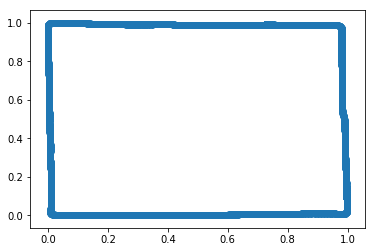

In [59]:
# 2D plot of MAP
plt.figure(1)
Map_Plot = plt.scatter(X_train[:,7], X_train[:,8])

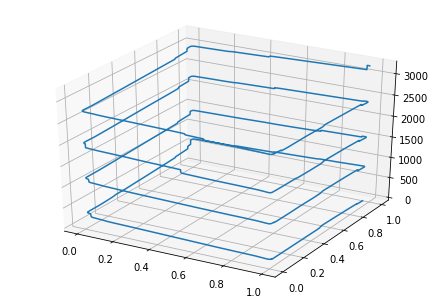

In [60]:

# 3D plot of MAP vs time
fig = plt.figure(2)
steps = list(range(0,3226))
ax = Axes3D(fig)
ax.plot3D(X_train[:,7], X_train[:,8], steps)

In [61]:
# for LSTM the input must be 3D
# Training
X_train_3D = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
print(X_train.shape)

(3226, 9)


In [62]:
# Prepare Model
model = tf.keras.Sequential()
model.add(LSTM(64, activation= 'tanh' , input_shape = (1,9)))

model.add(Dense(3))
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mae','acc'])
model.fit( X_train_3D,Y_train,epochs = 10 ,batch_size = 50, verbose =2)
Predict = model.predict(X_train_3D, verbose = 2)

Epoch 1/10
 - 1s - loss: 0.3368 - mean_absolute_error: 0.3368 - acc: 0.5487
Epoch 2/10
 - 0s - loss: 0.2601 - mean_absolute_error: 0.2601 - acc: 0.7012
Epoch 3/10
 - 0s - loss: 0.2302 - mean_absolute_error: 0.2302 - acc: 0.6909
Epoch 4/10
 - 0s - loss: 0.2076 - mean_absolute_error: 0.2076 - acc: 0.7378
Epoch 5/10
 - 0s - loss: 0.1903 - mean_absolute_error: 0.1903 - acc: 0.7746
Epoch 6/10
 - 0s - loss: 0.1761 - mean_absolute_error: 0.1761 - acc: 0.8230
Epoch 7/10
 - 0s - loss: 0.1596 - mean_absolute_error: 0.1596 - acc: 0.8416
Epoch 8/10
 - 0s - loss: 0.1417 - mean_absolute_error: 0.1417 - acc: 0.8599
Epoch 9/10
 - 0s - loss: 0.1333 - mean_absolute_error: 0.1333 - acc: 0.8782
Epoch 10/10
 - 0s - loss: 0.1274 - mean_absolute_error: 0.1274 - acc: 0.8807
 - 0s
(3226, 9) (3226, 3)


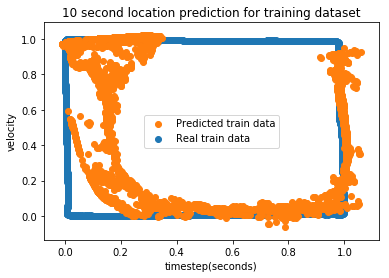

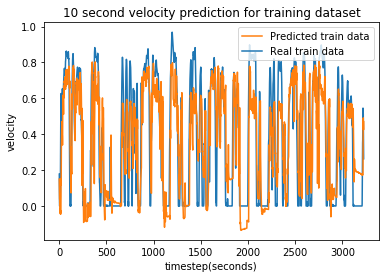

(846, 9)
 - 0s


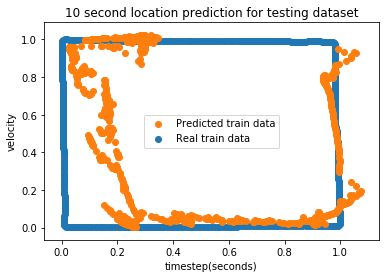

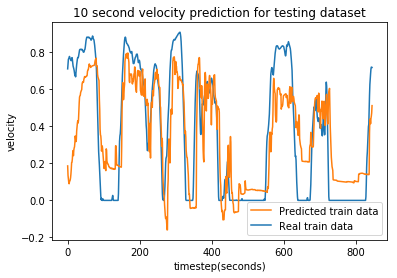

In [63]:
# Plot predictions
plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2,=  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

# Testing
X_test_3D = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print(X_test.shape)
Predict_test = model.predict(X_test_3D, verbose = 2)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [64]:
# Calculation of the loss (prediction error)
MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.04414219735533042 Mean Squared Error 10 second


# Decision Trees

In [66]:
# Prepare Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(min_samples_split=100,random_state = 2)
regressor.fit(X_train, Y_train)

Predict = regressor.predict(X_train)


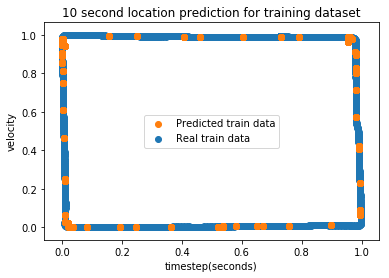

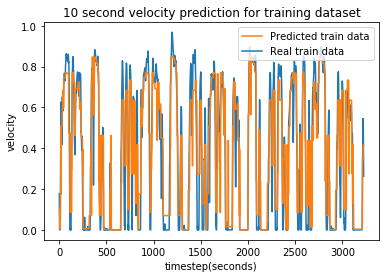

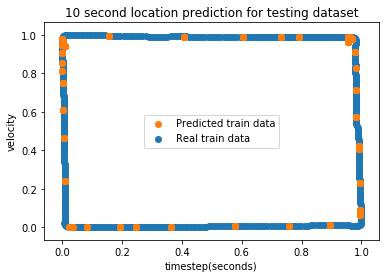

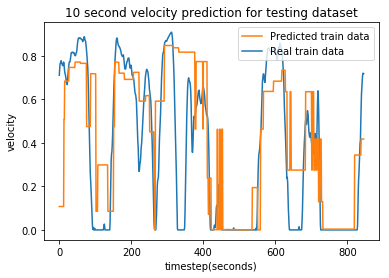

In [69]:
# Plot predictions
plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2, =  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

Predict_test = regressor.predict(X_test)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [68]:
# Calculation of the loss (prediction error)
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.0654146189402025 Mean Squared Error 10 second


# Random Forest

In [74]:
# Prepare Model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(min_samples_split=100,random_state = 2)
regressor.fit(X_train, Y_train)

Predict = regressor.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


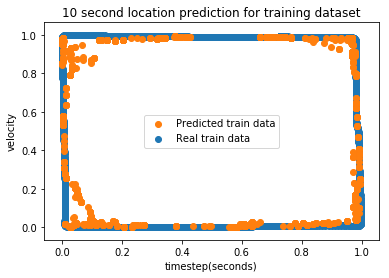

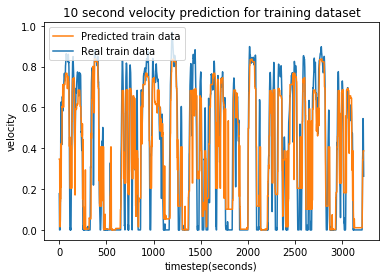

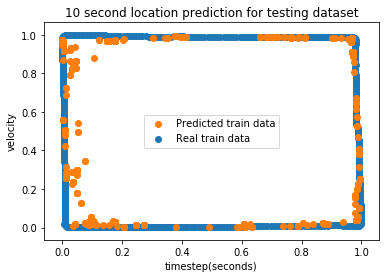

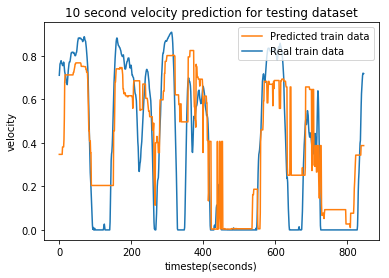

In [75]:
# Plot predictions
plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2, =  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

Predict_test = regressor.predict(X_test)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [76]:
# Plot predictions
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.037708571320737586 Mean Squared Error 10 second
